<a href="https://colab.research.google.com/github/Kishanditto/CODSOFT/blob/main/Fraudulent_credit_card_transactions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model'
s performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

```



Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


Step 2: Load and preprocess the data



In [2]:
# Load the dataset
creditcard = pd.read_csv('/content/creditcard.csv')


In [3]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
116937,74484,-0.934006,-1.503903,1.058895,-2.361391,-2.028143,-0.363832,0.952631,-0.051021,-0.210507,...,0.030498,-0.010490,0.865103,0.481051,-0.389144,-0.149430,0.050944,0.184436,377.73,0.0
116938,74484,-3.127918,0.405786,1.898121,0.494119,-1.374594,1.513014,-0.335495,0.243147,1.332244,...,-0.970703,-0.397175,-0.439562,-0.326466,0.694057,-0.111650,0.391746,0.301610,100.00,0.0
116939,74484,1.195331,-0.166388,-1.623243,-0.588598,2.262196,3.029452,-0.062796,0.659896,-0.320458,...,-0.392730,-1.489906,0.046603,0.993453,0.416458,0.145904,-0.075984,0.015540,80.90,0.0
116940,74484,1.085605,-0.145635,1.077927,1.638285,-0.472635,0.828304,-0.474942,0.260914,1.157265,...,-0.423978,-0.727626,0.021664,-0.256942,0.496296,-0.491121,0.093949,0.028586,21.02,0.0
116941,74484,-1.511932,0.687085,1.294324,-1.542139,-0.075181,-0.617780,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,116942.0,46555.919858,18692.683683,0.000000,35373.000000,48402.000000,61799.000000,74484.000000
V1,116942.0,-0.254372,1.837763,-56.407510,-1.021560,-0.263961,1.155504,1.960497
V2,116942.0,-0.011079,1.633274,-72.715728,-0.586654,0.087372,0.752744,18.902453
V3,116942.0,0.679823,1.296662,-33.680984,0.174900,0.754080,1.376219,4.226108
V4,116942.0,0.155177,1.335851,-5.172595,-0.705556,0.182479,1.014715,16.715537
V5,116942.0,-0.283503,1.333416,-42.147898,-0.904684,-0.316101,0.243386,34.801666
V6,116942.0,0.091362,1.293633,-26.160506,-0.651636,-0.161610,0.482518,22.529298
V7,116941.0,-0.115035,1.193083,-31.764946,-0.602491,-0.067533,0.411126,36.677268
V8,116941.0,0.059857,1.226684,-73.216718,-0.133967,0.077845,0.370001,20.007208
V9,116941.0,-0.072416,1.097922,-9.283925,-0.703675,-0.136354,0.512976,10.392889


In [6]:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


Split X and Y

In [8]:
# Separate features and labels
X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

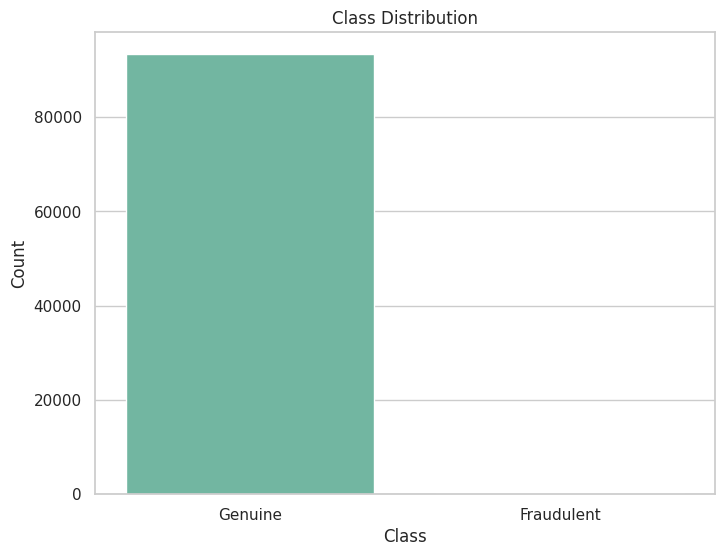

In [9]:
# Visualize class distribution before and after balancing
plt.figure(figsize=(8, 6))

sns.set(style="whitegrid")
sns.countplot(x=y_train, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Genuine", "Fraudulent"])
plt.show()


Step 3: Handle class imbalance



In [12]:
# Remove rows with NaN labels
X_train_cleaned = X_train_scaled[~np.isnan(y_train)]
y_train_cleaned = y_train[~np.isnan(y_train)]

# Then proceed with oversampling or undersampling
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_cleaned, y_train_cleaned)


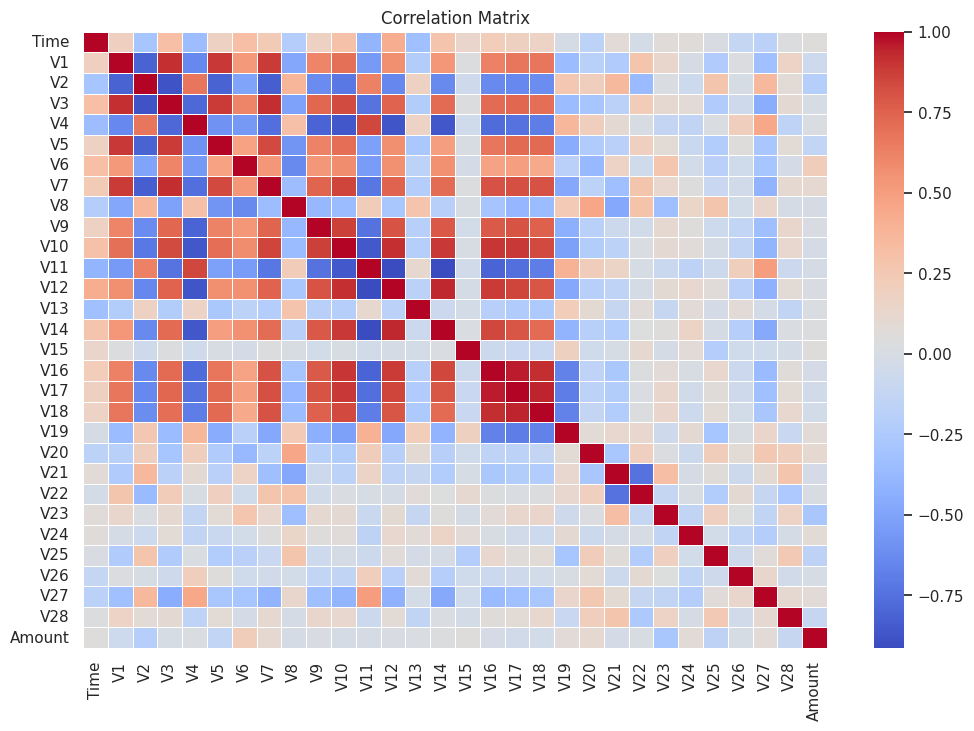

In [13]:
# Convert the balanced training data back to a Pandas DataFrame
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X_train.columns)

# Calculate the correlation matrix
correlation_matrix = X_train_balanced_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Step 4: Train and evaluate the model

You can choose between Logistic Regression or Random Forest as your classification algorithm. Here, I'll show both options:



Using Logistic Regression:

In [14]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Logistic Regression Model:
Precision: 0.08
Recall: 0.88
F1-score: 0.15


Using Random Forest:

In [15]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Model:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Random Forest Model:
Precision: 1.00
Recall: 0.77
F1-score: 0.87


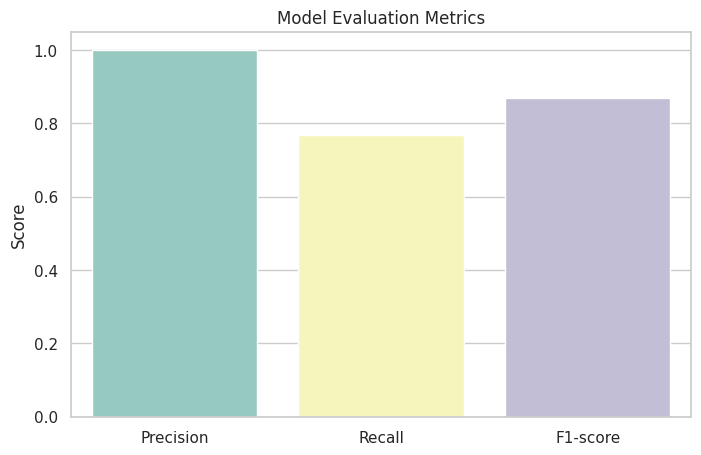

In [16]:
# Visualize precision, recall, and F1-score
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, palette="Set3")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()
